<a href="https://colab.research.google.com/github/usnhee/TIL-/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k_Means Clustering 
- 군집화 모델의 시각화를 보자.

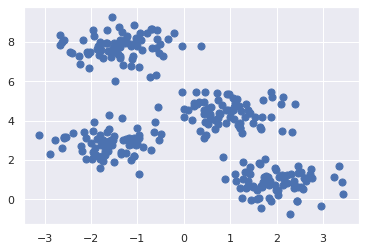

In [11]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)

In [13]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [14]:
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[2 1 3 1 2 2 0 3 1 1 0 1 3 1 2 3 3 2 0 0 2 2 3 0 0 3 2 3 0 3 1 1 3 1 1 1 1
 1 0 2 3 0 3 3 0 0 1 0 1 2 0 2 1 2 2 0 1 0 1 2 1 3 1 0 0 0 1 2 1 0 3 0 1 0
 0 1 0 3 2 1 2 3 2 2 1 3 2 3 1 1 3 2 1 0 0 3 2 2 3 0 1 2 1 2 3 2 2 3 1 3 0
 0 2 1 2 3 1 2 2 3 0 2 0 2 2 2 2 0 2 0 1 0 0 2 1 0 0 1 3 1 1 0 3 0 3 0 1 3
 1 1 1 3 1 3 2 0 1 0 2 3 1 3 3 2 3 0 0 3 2 3 3 1 2 3 0 1 2 2 3 0 2 3 0 0 3
 3 3 3 2 1 3 0 3 3 0 0 0 3 0 1 3 0 2 0 3 1 0 1 3 1 3 0 3 3 1 0 0 2 2 3 1 2
 2 0 2 0 3 1 1 3 3 1 3 2 0 3 2 0 1 0 2 3 2 1 1 1 1 0 0 1 3 0 2 3 0 0 0 2 2
 1 3 3 0 2 1 0 3 1 3 2 2 0 0 3 2 2 2 3 1 1 2 2 3 2 2 2 1 0 1 3 2 2 1 1 1 2
 2 3 1 0]


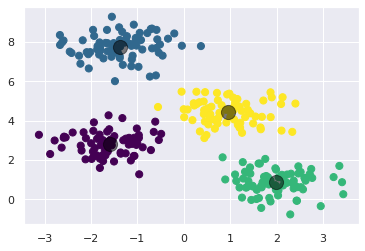

In [15]:
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c= 'black', s=200, alpha=0.5)

## 필기체를 k-means로 클러스터링해보자. 


In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np 
%matplotlib inline 

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

kmeans.cluster_centers_.shape

(10, 64)

군집 10개, 64차원 

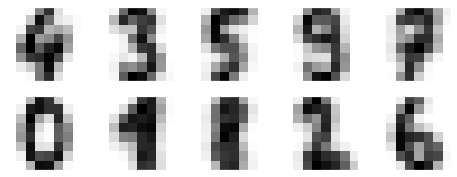

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)

for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[],yticks=[])
  axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

# DBSCAN 
## Density Based Spatial Clustering Application with Noise 

- 노이즈에 강한 군집모델 
- 밀도 있게 연결된 데이터 집합을 동일한 클러스터로 결정함 

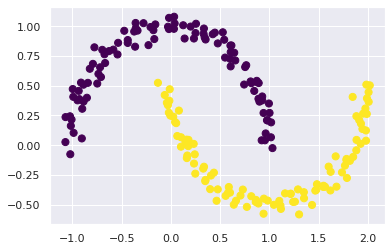

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)

from sklearn.cluster import DBSCAN
D_labels = DBSCAN(eps=0.3, min_samples=15).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=D_labels, s=50, cmap='viridis')

# PCA (Principal Component Analysis)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

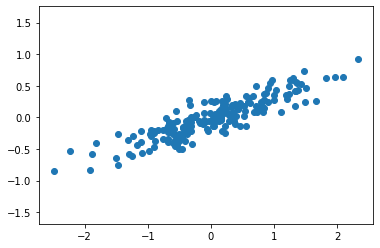

In [3]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T      #T는 Transpose -행렬 뒤집기
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')           

- 성분(component) : 벡터의 방향
- 설명분산(explained variance) : 해당 벡터의 제곱 길이 

In [4]:
from sklearn.decomposition import PCA
mypca = PCA(n_components =2)
mypca.fit(X)


PCA(n_components=2)

In [5]:
print(mypca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(mypca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

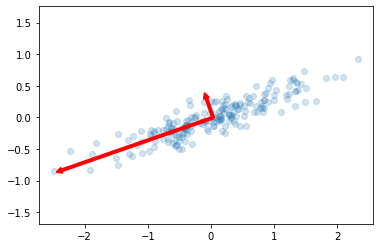

In [7]:
def draw_vector(v0,v1,ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(color='red', arrowstyle = 'simple', linewidth=2, shrinkA=0, shrinkB=0)
  ax.annotate('', v1, v0, arrowprops=arrowprops)

  #data plotting
plt.scatter(X[:,0],X[:,1], alpha=0.2)
for length, vector in zip(mypca.explained_variance_, mypca.components_):
  v =vector* 3 *np.sqrt(length)     # 3은 크기를 크게 하기 위해 곱해줌 
  draw_vector(mypca.mean_, mypca.mean_ + v)
plt.axis('equal')

## 차원축소에 응용 
- 가장 작은 주성분 중 하나 삭제해 최대 데이터 분산을 보존하는 더 작은 차원의 데이터 사용

In [8]:
dimpca = PCA(n_components =1)
dimpca.fit(X)
X_pca = dimpca.transform(X)
print('original shape: ', X.shape)
print('transformed shape: ', X_pca.shape)


original shape:  (200, 2)
transformed shape:  (200, 1)


### 역변환

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

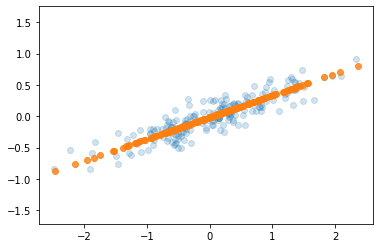

In [9]:
X_new = dimpca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)   # alpha는 투명도 
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.8)
plt.axis('equal')

## 특징 추출: 얼굴 특징 추출 

In [11]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [12]:
from sklearn.decomposition import PCA
face_pca = PCA(150)
face_pca.fit(faces.data)

PCA(n_components=150)

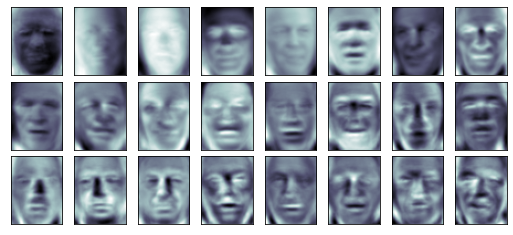

In [13]:
fig, axis = plt.subplots(3,8, figsize=(9,4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axis.flat):
  ax.imshow(face_pca.components_[i].reshape(62,47), cmap='bone')